<a href="https://colab.research.google.com/github/maheravi/Deep-Learning/blob/main/Recurrent%20Neural%20Network/TensorFlow_RNN_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [6]:
N = 1500
t = np.arange(0,N)

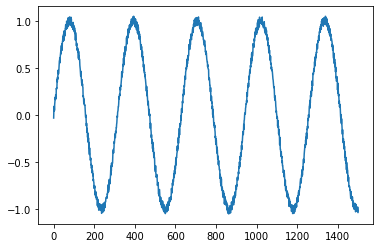

In [7]:
data_sin = np.sin(0.02 * t) + np.random.uniform(-0.05, 0.05, N)
plt.plot(data_sin)

In [8]:
def ConvertSignalToDataset(signal, step):
  X = []
  y = []
  for i in range(len(signal)-step):
    j = i + step
    X.append(signal[i:j])
    y.append(signal[j])

  return np.array(X), np.array(y)

In [63]:
seq_length = 10
X, y = ConvertSignalToDataset(data_sin, seq_length)

In [10]:
train_size = int(len(y) * 0.8)
test_size = len(y) - train_size

In [11]:
X_train = np.array(X[0:train_size])
y_train = np.array(y[0:train_size])

X_test = np.array(X[train_size:len(X)])
y_test = np.array(y[train_size:len(y)])

In [12]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [13]:
model = tf.keras.models.Sequential([
        layers.SimpleRNN(units=64, input_shape=(None, 1)),
        layers.Dense(1)
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MSE,
              )

In [15]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20
75/75 [==============================] - 1s 3ms/step - loss: 0.0042
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 3/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 4/20
75/75 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 5/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 6/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 7/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 8/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 9/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 10/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 11/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 12/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 13/20
75/75 [==============================

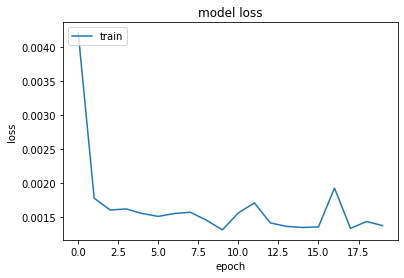

In [16]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [18]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

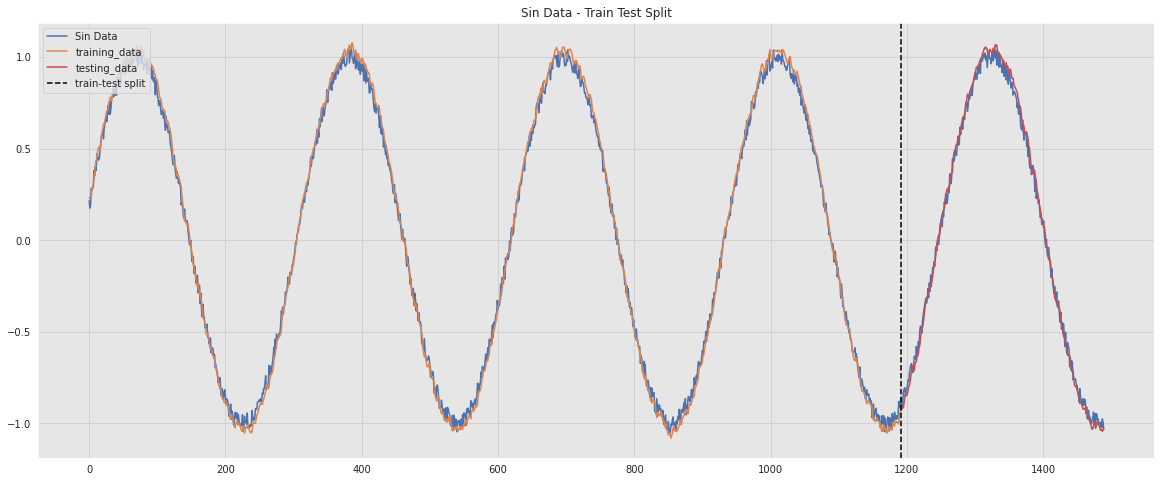

In [70]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(x=np.arange(0,train_size+test_size),y=np.squeeze(y), color=sns_c[0], label='Sin Data', ax=ax)
sns.lineplot(x=np.arange(0,train_size),y=np.squeeze(y_pred_train), color=sns_c[1], label='training_data', ax=ax)
sns.lineplot(x=train_size+np.arange(0,test_size),y=np.squeeze(y_pred_test), color=sns_c[3], label='testing_data', ax=ax)
ax.axvline(x = train_size, color='black', linestyle='--', label='train-test split')
ax.legend(loc='upper left')
ax.set(title='Sin Data - Train Test Split');